In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score

from rfpimp import permutation_importances
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.woe import WOEEncoder

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [4]:
df = pd.concat([train, test], axis= 0)

In [6]:
ids = test['Patient Id']

In [7]:
df = df.drop('Family Name', axis= 1)

In [8]:
df.isnull().mean() * 100

Patient Id                                           0.000000
Patient Age                                          4.523266
Genes in mother's side                               0.000000
Inherited from father                                2.716495
Maternal gene                                       20.708127
Paternal gene                                        0.000000
Blood cell count (mcL)                               0.000000
Patient First Name                                   0.000000
Father's name                                        0.000000
Mother's age                                        19.132750
Father's age                                        18.974261
Institute Name                                      22.638519
Location of Institute                                0.000000
Status                                               0.000000
Respiratory Rate (breaths/min)                      15.959807
Heart Rate (rates/min                               15.890072
Test 1  

In [9]:
df['Full_name']= df['Patient First Name'] + '_' + df["Father's name"]

In [10]:
df['Patient Age'].fillna(value=df['Patient Age'].median(), inplace=True, axis=0)

In [11]:
ages = pd.get_dummies(df['Patient Age'], drop_first=True, prefix= 'age_')
df = df.drop('Patient Age', axis =1)
df= pd.concat([df, ages], axis=1)

In [12]:
genes = pd.get_dummies(df["Genes in mother's side"], drop_first=True, prefix= 'genes_')
df = df.drop("Genes in mother's side", axis= 1)
df = pd.concat([df, genes], axis= 1)

In [13]:
df['Inherited from father'].fillna(value=df['Inherited from father'].mode()[0], inplace=True, axis=0)
fath = pd.get_dummies(df["Inherited from father"], drop_first=True, prefix= 'father_')
df = df.drop("Inherited from father", axis= 1)
df = pd.concat([df, fath], axis= 1)

In [14]:
df['Maternal gene'].fillna(value=df['Maternal gene'].mode()[0], inplace=True, axis=0)
maternal = pd.get_dummies(df["Maternal gene"], drop_first=True, prefix= 'maternal_')
df = df.drop("Maternal gene", axis= 1)
df = pd.concat([df, maternal], axis= 1)

In [15]:
paternal = pd.get_dummies(df["Paternal gene"], drop_first=True, prefix= 'paternal_')
df = df.drop("Paternal gene", axis= 1)
df = pd.concat([df, paternal], axis= 1)

In [16]:
df["Mother's age"].fillna(value=df["Mother's age"].median(), inplace=True, axis=0)
df["Father's age"].fillna(value=df["Father's age"].median(), inplace=True, axis=0)

In [17]:
df['Total_age']= df["Mother's age"] + df["Father's age"]

In [18]:
df['Institute Name'].fillna(value=df['Institute Name'].mode()[0], inplace=True, axis= 0)

In [19]:
stat = pd.get_dummies(df.Status, drop_first=True, prefix= 'statuss_')
df = df.drop('Status', axis= 1)
df = pd.concat([df,stat], axis=1)

In [20]:
df['Respiratory Rate (breaths/min)'].fillna(value=df['Respiratory Rate (breaths/min)'].mode()[0], inplace=True, axis=0)
respi = pd.get_dummies(df['Respiratory Rate (breaths/min)'], drop_first=True, prefix= 'respi_rate_')
df = df.drop('Respiratory Rate (breaths/min)', axis= 1)
df = pd.concat([df,respi], axis=1)

In [21]:
df['Heart Rate (rates/min'].fillna(value=df['Heart Rate (rates/min'].mode()[0], inplace=True, axis= 0)
h_rate = pd.get_dummies(df['Heart Rate (rates/min'], drop_first=True, prefix= 'heart_rate_')
df = df.drop('Heart Rate (rates/min', axis= 1)
df = pd.concat([df,h_rate], axis=1)

In [22]:
df['Test 1'].fillna(value=-99, inplace=True, axis=0)
df['Test 2'].fillna(value=-99, inplace=True, axis=0)
df['Test 3'].fillna(value=-99, inplace=True, axis=0)
df['Test 4'].fillna(value=-99, inplace=True, axis=0)
df['Test 5'].fillna(value=-99, inplace=True, axis=0)

In [23]:
test1 = pd.get_dummies(df['Test 1'], drop_first=True, prefix= 'test1_')
df = df.drop('Test 1', axis= 1)
df = pd.concat([df, test1], axis=1)

test2 = pd.get_dummies(df['Test 2'], drop_first=True, prefix= 'test2_')
df = df.drop('Test 2', axis= 1)
df = pd.concat([df, test2], axis=1)

test3 = pd.get_dummies(df['Test 3'], drop_first=True, prefix= 'test3_')
df = df.drop('Test 3', axis= 1)
df = pd.concat([df, test3], axis=1)

test4 = pd.get_dummies(df['Test 4'], drop_first=True, prefix= 'test4_')
df = df.drop('Test 4', axis= 1)
df = pd.concat([df, test4], axis=1)

test5 = pd.get_dummies(df['Test 5'], drop_first=True, prefix= 'test5_')
df = df.drop('Test 5', axis= 1)
df = pd.concat([df, test5], axis=1)

In [24]:
df['Parental consent'].fillna(value='-99', inplace=True, axis=0)
parent = pd.get_dummies(df['Parental consent'], drop_first=True, prefix= 'parent_')
df = df.drop('Parental consent', axis= 1)
df = pd.concat([df, parent], axis=1)

In [25]:
df['Follow-up'].fillna(value='-99', inplace=True, axis=0)
follow = pd.get_dummies(df['Follow-up'], drop_first=True, prefix= 'follow_')
df = df.drop('Follow-up', axis= 1)
df = pd.concat([df, follow], axis=1)

In [26]:
df['Gender'].fillna(value='-99', inplace=True, axis= 0)
gend = pd.get_dummies(df['Gender'], drop_first=True, prefix= 'gender_')
df = df.drop('Gender', axis= 1)
df = pd.concat([df, gend], axis=1)

In [27]:
df['Birth asphyxia'].fillna(value='-99', inplace=True, axis=0)
birth = pd.get_dummies(df['Birth asphyxia'], drop_first=True, prefix= 'birth_')
df = df.drop('Birth asphyxia', axis= 1)
df = pd.concat([df, birth], axis=1)

In [28]:
df['Autopsy shows birth defect (if applicable)'].fillna(value='-99', inplace=True, axis=0)
defect = pd.get_dummies(df['Autopsy shows birth defect (if applicable)'], drop_first=True, prefix= 'defect_')
df = df.drop('Autopsy shows birth defect (if applicable)', axis= 1)
df = pd.concat([df, defect], axis=1)

In [29]:
df['Place of birth'].fillna(value='-99', inplace=True, axis=0)
place = pd.get_dummies(df['Place of birth'], drop_first=True, prefix= 'place_')
df = df.drop('Place of birth', axis= 1)
df = pd.concat([df, place], axis=1)

In [30]:
df['Folic acid details (peri-conceptional)'].fillna(value='-99', inplace=True, axis=0)
folic = pd.get_dummies(df['Folic acid details (peri-conceptional)'], drop_first=True, prefix= 'folic_acid_')
df = df.drop('Folic acid details (peri-conceptional)', axis= 1)
df = pd.concat([df, folic], axis=1)

In [31]:
df['H/O serious maternal illness'].fillna(value='-99', inplace=True, axis=0)
mat = pd.get_dummies(df['H/O serious maternal illness'], drop_first=True, prefix= 'illness_')
df = df.drop('H/O serious maternal illness', axis= 1)
df = pd.concat([df, mat], axis=1)

In [32]:
df['H/O radiation exposure (x-ray)']= df['H/O radiation exposure (x-ray)'].astype(str).replace('-', np.nan)
df['H/O radiation exposure (x-ray)'].fillna(value='-99', inplace=True, axis=0)
xray = pd.get_dummies(df['H/O radiation exposure (x-ray)'], drop_first=True, prefix= 'xray_')
df = df.drop('H/O radiation exposure (x-ray)', axis= 1)
df = pd.concat([df, xray], axis=1)

In [33]:
df['H/O substance abuse']= df['H/O substance abuse'].astype(str).replace('-', '-99')
df['H/O substance abuse'].fillna(value= '-99', inplace= True, axis= 0)
abuse = pd.get_dummies(df['H/O substance abuse'], drop_first=True, prefix= 'abuse_')
df = df.drop('H/O substance abuse', axis= 1)
df = pd.concat([df, abuse], axis=1)

In [34]:
df['Assisted conception IVF/ART'].fillna(value='-99', inplace=True, axis=0)
assist = pd.get_dummies(df['Assisted conception IVF/ART'], drop_first=True, prefix= 'assist_')
df = df.drop('Assisted conception IVF/ART', axis= 1)
df = pd.concat([df, assist], axis=1)

In [35]:
df['History of anomalies in previous pregnancies'].fillna(value='-99', inplace=True, axis=0)
anomalies = pd.get_dummies(df['History of anomalies in previous pregnancies'], drop_first=True, prefix= 'anomalies_')
df = df.drop('History of anomalies in previous pregnancies', axis= 1)
df = pd.concat([df, anomalies], axis=1)

In [36]:
df['No. of previous abortion'].fillna(value=-99, inplace=True, axis=0)
abortion = pd.get_dummies(df['No. of previous abortion'], drop_first=True, prefix= 'abortion_')
df = df.drop('No. of previous abortion', axis= 1)
df = pd.concat([df, abortion], axis=1)

In [37]:
df['Birth defects'].fillna(value='-99', inplace=True, axis=0)
birth_def = pd.get_dummies(df['Birth defects'], drop_first=True, prefix= 'birth_def_')
df = df.drop('Birth defects', axis= 1)
df = pd.concat([df, birth_def], axis=1)

In [38]:
df['White Blood cell count (thousand per microliter)'].fillna(value=df['White Blood cell count (thousand per microliter)'].median(), inplace=True, axis=0)

In [39]:
df['Blood test result'].fillna(value='-99', axis=0, inplace=True)
blood = pd.get_dummies(df['Blood test result'], drop_first=True, prefix= 'blood_result_')
df = df.drop('Blood test result', axis= 1)
df = pd.concat([df, blood], axis=1)

In [40]:
df['Symptom 1'].fillna(value=-99, axis= 0, inplace=True)
df['Symptom 2'].fillna(value=-99, axis= 0, inplace=True)
df['Symptom 3'].fillna(value=-99, axis= 0, inplace=True)
df['Symptom 4'].fillna(value=-99, axis= 0, inplace=True)
df['Symptom 5'].fillna(value=-99, axis= 0, inplace=True)

In [41]:
sym1 = pd.get_dummies(df['Symptom 1'], drop_first=True, prefix= 'sym1_')
df = df.drop('Symptom 1', axis= 1)
df = pd.concat([df, sym1], axis=1)

sym2 = pd.get_dummies(df['Symptom 2'], drop_first=True, prefix= 'sym2_')
df = df.drop('Symptom 2', axis= 1)
df = pd.concat([df, sym2], axis=1)

sym3 = pd.get_dummies(df['Symptom 3'], drop_first=True, prefix= 'sym3_')
df = df.drop('Symptom 3', axis= 1)
df = pd.concat([df, sym3], axis=1)

sym4 = pd.get_dummies(df['Symptom 4'], drop_first=True, prefix= 'sym4_')
df = df.drop('Symptom 4', axis= 1)
df = pd.concat([df, sym4], axis=1)

sym5 = pd.get_dummies(df['Symptom 5'], drop_first=True, prefix= 'sym5_')
df = df.drop('Symptom 5', axis= 1)
df = pd.concat([df, sym5], axis=1)

In [42]:
le = LabelEncoder()
le.fit(df['Institute Name'])
df['Institute Name'] = le.transform(df['Institute Name'])

In [43]:
le = LabelEncoder()
le.fit(df['Location of Institute'])
df['Location of Institute'] = le.transform(df['Location of Institute'])

In [44]:
le = LabelEncoder()
le.fit(df['Full_name'])
df['Full_name'] = le.transform(df['Full_name'])

In [46]:
train = df[:22083]
test = df[22083:]

In [47]:
train.dropna(axis=0, how='any', inplace=True)

<ipython-input-47-f039fae513fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(axis=0, how='any', inplace=True)


In [48]:
test = test.drop(['Genetic Disorder', 'Disorder Subclass'], axis= 1)

In [49]:
train['Genetic Disorder'] = train['Genetic Disorder'].map({'Mitochondrial genetic inheritance disorders':0,
                                                    'Multifactorial genetic inheritance disorders':1,
                                                    'Single-gene inheritance diseases':2})
train['Disorder Subclass'] = train['Disorder Subclass'].map({"Leber's hereditary optic neuropathy":0,
                                                       'Diabetes':1,
                                                       'Leigh syndrome':2,
                                                       'Cancer':3,
                                                       'Cystic fibrosis':4,
                                                       'Tay-Sachs':5,
                                                       'Hemochromatosis':6,
                                                       'Mitochondrial myopathy':7,
                                                       "Alzheimer's":8})

<ipython-input-49-e39f36aad10a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Genetic Disorder'] = train['Genetic Disorder'].map({'Mitochondrial genetic inheritance disorders':0,
<ipython-input-49-e39f36aad10a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Disorder Subclass'] = train['Disorder Subclass'].map({"Leber's hereditary optic neuropathy":0,


In [ ]:
train.isnull().sum()

In [50]:
[var for var in df.columns if df[var].dtypes == 'O']

['Patient Id',
 'Patient First Name',
 "Father's name",
 'Genetic Disorder',
 'Disorder Subclass']

In [ ]:
train[cat_cols]

In [ ]:
df['Patient First Name'].value_counts()

In [ ]:
cat_cols = [
 'Patient First Name',
 "Father's name",
 'Institute Name',
 'Location of Institute',
 'Full_name']

In [51]:
[var for var in train.columns if train[var].dtypes != 'O']

['Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'Institute Name',
 'Location of Institute',
 'White Blood cell count (thousand per microliter)',
 'Genetic Disorder',
 'Disorder Subclass',
 'Full_name',
 'age__1.0',
 'age__2.0',
 'age__3.0',
 'age__4.0',
 'age__5.0',
 'age__6.0',
 'age__7.0',
 'age__8.0',
 'age__9.0',
 'age__10.0',
 'age__11.0',
 'age__12.0',
 'age__13.0',
 'age__14.0',
 'genes__Yes',
 'father__Yes',
 'maternal__Yes',
 'paternal__Yes',
 'Total_age',
 'statuss__Deceased',
 'respi_rate__Normal (30-60)',
 'respi_rate__Tachypnea',
 'heart_rate__Normal',
 'heart_rate__Tachycardia',
 'test1__0.0',
 'test2__0.0',
 'test3__0.0',
 'test4__1.0',
 'test5__0.0',
 'parent__Yes',
 'follow__High',
 'follow__Low',
 'gender__Ambiguous',
 'gender__Female',
 'gender__Male',
 'birth__No',
 'birth__No record',
 'birth__Not available',
 'birth__Yes',
 'defect__No',
 'defect__None',
 'defect__Not applicable',
 'defect__Yes',
 'place__Home',
 'place__Institute',
 'folic_acid__No'

In [52]:
cont_cols= ['Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'Institute Name',
 'Location of Institute',
 'White Blood cell count (thousand per microliter)',
 'Full_name',
 'age__1.0',
 'age__2.0',
 'age__3.0',
 'age__4.0',
 'age__5.0',
 'age__6.0',
 'age__7.0',
 'age__8.0',
 'age__9.0',
 'age__10.0',
 'age__11.0',
 'age__12.0',
 'age__13.0',
 'age__14.0',
 'genes__Yes',
 'father__Yes',
 'maternal__Yes',
 'paternal__Yes',
 'Total_age',
 'statuss__Deceased',
 'respi_rate__Normal (30-60)',
 'respi_rate__Tachypnea',
 'heart_rate__Normal',
 'heart_rate__Tachycardia',
 'test1__0.0',
 'test2__0.0',
 'test3__0.0',
 'test4__1.0',
 'test5__0.0',
 'parent__Yes',
 'follow__High',
 'follow__Low',
 'gender__Ambiguous',
 'gender__Female',
 'gender__Male',
 'birth__No',
 'birth__No record',
 'birth__Not available',
 'birth__Yes',
 'defect__No',
 'defect__None',
 'defect__Not applicable',
 'defect__Yes',
 'place__Home',
 'place__Institute',
 'folic_acid__No',
 'folic_acid__Yes',
 'illness__No',
 'illness__Yes',
 'xray__No',
 'xray__Not applicable',
 'xray__Yes',
 'xray__nan',
 'abuse__No',
 'abuse__Not applicable',
 'abuse__Yes',
 'abuse__nan',
 'assist__No',
 'assist__Yes',
 'anomalies__No',
 'anomalies__Yes',
 'abortion__0.0',
 'abortion__1.0',
 'abortion__2.0',
 'abortion__3.0',
 'abortion__4.0',
 'birth_def__Multiple',
 'birth_def__Singular',
 'blood_result__abnormal',
 'blood_result__inconclusive',
 'blood_result__normal',
 'blood_result__slightly abnormal',
 'sym1__0.0',
 'sym1__1.0',
 'sym2__0.0',
 'sym2__1.0',
 'sym3__0.0',
 'sym3__1.0',
 'sym4__0.0',
 'sym4__1.0',
 'sym5__0.0',
 'sym5__1.0']

In [88]:
X_train = train[cont_cols]
y_train = train['Disorder Subclass']
X_test = test[cont_cols]

In [78]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=10, stratify= y)

In [84]:
lgbm_param= {'reg_lambda': 0.9516558747237848,
 'reg_alpha': 0.20014543420377964,
 'colsample_bytree': 0.6,
 'subsample': 1.0,
 'learning_rate': 0.053365382483422465,
 'max_depth': 7,
 'min_child_samples': 113,
 'num_leaves': 72}

In [68]:
n_folds = 10
subbed = []
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=10)


for fold, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    print('=============== Fold No:',fold+1,'===============')
    X_tr, X_tst = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_tr, y_tst = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = LGBMClassifier(n_estimators=10000, random_state=10, **lgbm_param)
    model.fit(X_tr, y_tr,eval_set=[(X_tst, y_tst)], early_stopping_rounds=30, verbose=500)
    print(f1_score(y_tst, model.predict(X_tst), average='macro'))
    subbed.append(f1_score(y_tst, model.predict(X_tst), average='macro'))
    pred = model.predict(X_test)
print(np.mean(subbed))

=============== Fold No: 1 ===============
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[107]	valid_0's multi_logloss: 1.33218
0.31376583822217885
=============== Fold No: 2 ===============
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[135]	valid_0's multi_logloss: 1.33655
0.32247282796278953
=============== Fold No: 3 ===============
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[118]	valid_0's multi_logloss: 1.33628
0.31598474428753787
=============== Fold No: 4 ===============
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[138]	valid_0's multi_logloss: 1.33202
0.3127504152233966
=============== Fold No: 5 ===============
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[170]	valid_0's multi_logloss: 1.32646
0.3159548792301913
============

In [ ]:
pred

In [86]:
predict_genetic = pd.DataFrame(pred)
predict_genetic

,0
0,1
1,0
2,0
3,0
4,2
...,...
9460,0
9461,0
9462,0
9463,1


In [90]:
predict_subclass = pd.DataFrame(pred)
predict_subclass

,0
0,1
1,7
2,7
3,4
4,4
...,...
9460,4
9461,4
9462,7
9463,1


In [87]:
predict_genetic['Genetic Disorder'] = predict_genetic[0].map({0:'Mitochondrial genetic inheritance disorders',
                                                              1:'Multifactorial genetic inheritance disorders',
                                                              2:'Single-gene inheritance diseases'})

In [91]:
predict_subclass['Disorder Subclass'] = predict_subclass[0].map({0:"Leber's hereditary optic neuropathy",
                                                                 1:'Diabetes',
                                                                 2:'Leigh syndrome',
                                                                 3:'Cancer',
                                                                 4:'Cystic fibrosis',
                                                                 5:'Tay-Sachs',
                                                                 6:'Hemochromatosis',
                                                                 7:'Mitochondrial myopathy',
                                                                 8:"Alzheimer's"})

In [ ]:
predict_genetic['Genetic Disorder']

In [ ]:
predict_subclass['Disorder Subclass']

In [ ]:
df['Genetic Disorder']

In [ ]:
models= [LGBMClassifier(metric= 'multi_error'), XGBClassifier(eval_metric= 'merror'), 
        CatBoostClassifier(eval_metric='TotalF1', verbose=0)]
for model in models:
    model.fit(X_train, y_train)
    pred= model.predict(X_test)
    print(f1_score(y_test, pred, average='macro'))

In [89]:
model= LGBMClassifier(**lgbm_param, random_state=10)
model.fit(X_train, y_train)
pred= model.predict(X_test)
#print(f1_score(y_test, pred, average='macro'))

In [92]:
sub = pd.DataFrame()
sub['Patient Id'] = ids
sub['Genetic Disorder'] = predict_genetic['Genetic Disorder']
sub['Disorder Subclass'] = predict_subclass['Disorder Subclass']
sub.to_csv('lgbm12.csv', index= False)

In [ ]:
{'reg_lambda': 0.9516558747237848,
 'reg_alpha': 0.20014543420377964,
 'colsample_bytree': 0.6,
 'subsample': 1.0,
 'learning_rate': 0.053365382483422465,
 'max_depth': 7,
 'min_child_samples': 113,
 'num_leaves': 72}

In [80]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df):
    plt.figure(figsize=(15,10))
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue')

In [81]:
def r2(rf, X_train, y_train):
    return f1_score(y_test, pred, average='macro')

perm_imp_rfpimp = permutation_importances(model, X_train, y_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

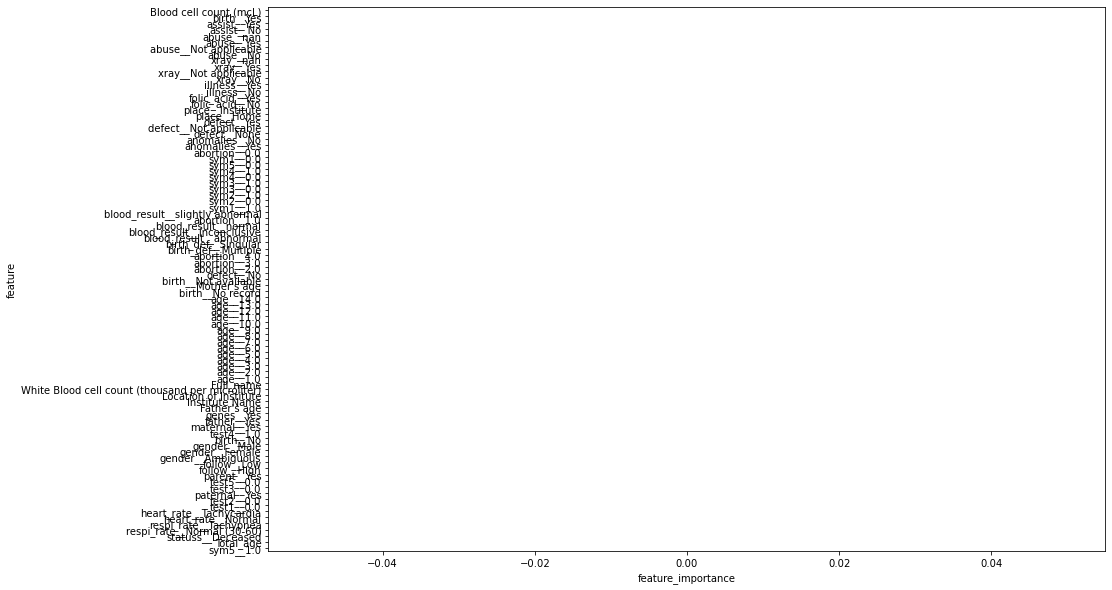

In [82]:
var_imp_plot(perm_imp_rfpimp)